<a href="https://colab.research.google.com/github/ann-tr/Splitting_pdf/blob/table_extract/table_extraction_camelot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "camelot-py[cv]"
!apt install python3-tk ghostscript

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
import camelot
from PyPDF2 import PdfReader

In [ ]:
!which gs

/usr/bin/gs


In [ ]:
!pip install ghostscript

In [ ]:
!pip install pypdf2==2.11.2




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
import PyPDF2

print(PyPDF2.__version__)


3.0.1


In [ ]:

import camelot
import PyPDF2
import ghostscript
import subprocess

print("Camelot version:", camelot.__version__)
print("PyPDF2 version:", PyPDF2.__version__)

# Verify Ghostscript
try:
    gs_version = subprocess.check_output(["gs", "--version"]).decode().strip()
    print("Ghostscript version:", gs_version)
except FileNotFoundError:
    print("Ghostscript is not installed or not found in the system path.")

Camelot version: 0.9.0
PyPDF2 version: 2.11.2
Ghostscript version: 9.55.0


In [ ]:
!pip install pypdf2==2.11.2

  Using cached pypdf2-2.11.2-py3-none-any.whl (220 kB)


In [ ]:
!pip uninstall -y pypdf2


Found existing installation: PyPDF2 3.0.1
Uninstalling PyPDF2-3.0.1:
  Successfully uninstalled PyPDF2-3.0.1


In [ ]:
!pip cache purge


Files removed: 0


In [ ]:
!pip uninstall -y PyPDF2== 2.11.2

In [ ]:
!pip install PyPDF2==2.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 4.0 MB/s eta 0:00:00


In [50]:
import PyPDF2
print("PyPDF2 version:", PyPDF2.__version__)

PyPDF2 version: 2.11.2


In [36]:
pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 46.5 MB/s eta 0:00:00


In [21]:
tables = camelot.read_pdf('/content/enapps2.pdf')
tables[0].df
tables[0].to_csv('normal_read.csv')



**get_page_dimensions**  function to determine page
*width* and *height*

calculated ***table_region*** *using assumed title block **width:height = 3:1  ratio

**extract_title_block** function to extract tittle block

In [55]:
import pymupdf
import camelot

def get_page_dimensions(pdf_path,title_block_ratio):
    document = pymupdf.open(pdf_path)
    title_block_dimensions = []
    for page_num in range(len(document)):
        page = document[page_num]
        width = round(page.rect.width,2)
        height = page.rect.height
        title_block_width = width
        title_block_height = round(height / title_block_ratio,2)

        # Store dimensions as tuple (width, height)
        title_block_dimensions.append(( title_block_height))
        title_block_dimensions.append( title_block_width)
        print(f"Page {page_num + 1}: Width = {width}, Height = {height}")


    document.close()
    return  title_block_dimensions

def extract_title_block(pdf_path, region):
  tables = camelot.read_pdf(pdf_path, table_region = region)
  tables[0].to_csv('using_function.csv')


# Input PDF path
pdf_path = "/content/75 Spring insertion assembly set 1 - Copy_page_2.pdf"
title_block_ratio = 3
# Get page dimensions
page_dimensions = get_page_dimensions(pdf_path,title_block_ratio)

print(page_dimensions)
# Extract tables from the PDF
y0 = str(page_dimensions[0])
x2 = str(page_dimensions[1])
yx = y0 +  "," + x2
region = '0' + y0 + '0'

extract_title_block(pdf_path, region)






Page 1: Width = 595.28, Height = 841.8900146484375
[280.63, 595.28]


In [56]:
print(tables[0].parsing_report)

{'accuracy': 84.44, 'whitespace': 87.5, 'order': 1, 'page': 1}


In [59]:
tables = camelot.read_pdf('/content/75 Spring insertion assembly set 1 - Copy_page_2.pdf',table_regions=['50,280.63, 595.28,0'],line_scale = 20, stream = True)






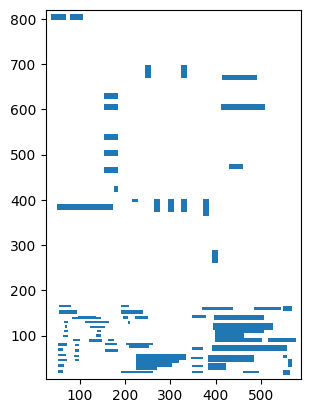

In [60]:
camelot.plot(tables[0], kind='text').show()

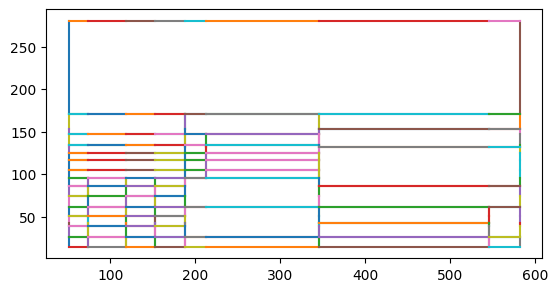

In [61]:
#tables = camelot.read_pdf('/content/enapps2.pdf',table_regions=['50,200,580,0'],line_scale = 30)
camelot.plot(tables[0], kind='grid').show()

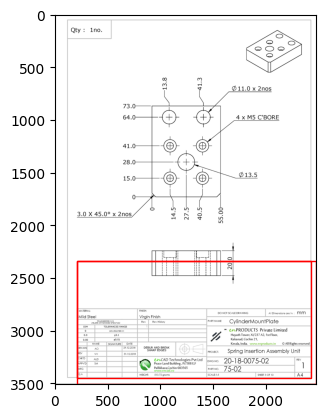

In [62]:
camelot.plot(tables[0], kind='contour').show()

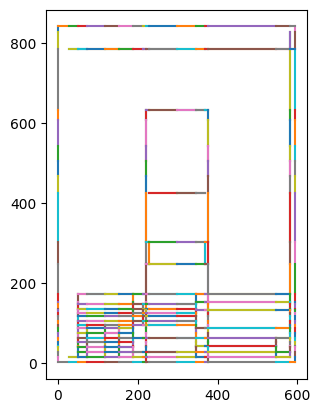

In [ ]:
tables = camelot.read_pdf('/content/enapps2.pdf',line_scale = 20)
camelot.plot(tables[0], kind='grid').show()
tables.export('without_specifying.csv', f='csv')


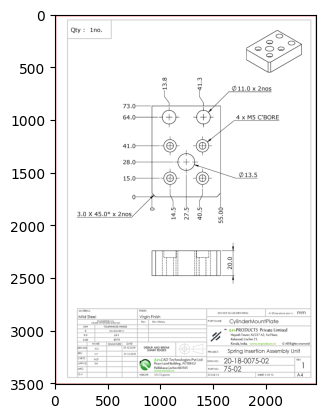

In [58]:
camelot.plot(tables[0], kind='contour').show()


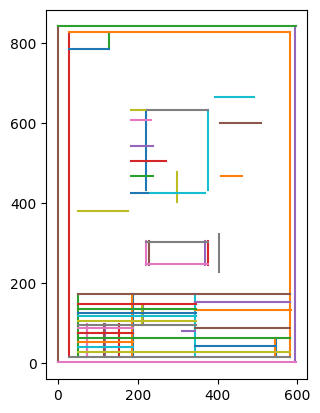

In [29]:
camelot.plot(tables[0], kind='line').show()

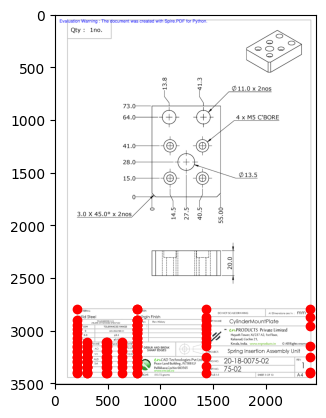

In [ ]:

camelot.plot(tables[0], kind='joint').show()

In [ ]:
pip install pandas


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/content/title_block1-page-1-table-1.csv')

# Step 2: Replace empty strings and strings with only white spaces with NaN
df.replace(r'^\s*$ \n', np.nan, regex=True, inplace=True)


new_file_path = df.to_csv("clean.csv" , sep = ",")


In [ ]:

import pandas as pd
import re

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/clean.csv")

# Define the word you want to search for
search_word = 'MATERIAL:'
# Function to find the word and extract the string that comes after it
def find_and_extract(text, search_word):

    # Define the regex pattern to find the search_word and capture the string after it

    pattern = re.compile(rf'{search_word}\s+\S+[^"]')
    match = pattern.search(text)
    if match:
        return match.group(1)  # Return the captured group (string after the search_word)
    return None

# Apply the function to each cell in the DataFrame
# Assuming the table data is in a single column, you can adjust if the data spans multiple columns
df['extracted'] = df.apply(lambda row: row.apply(lambda x: find_and_extract(str(x), search_word)).dropna().values, axis=1)

# Filter out empty results
df_extracted = df[df['extracted'].map(len) > 0]

# Print or save the extracted data
print(df_extracted)

# Optionally, save the results to a new CSV file
df_extracted.to_csv('extracted_data.csv', index=False)


Empty DataFrame
Columns: [Unnamed: 0, MATERIAL:
Mild Steel, FINISH:
Virgin Finish, DO NOT SCALE DRAWING
All Dimensions are in  :
mm, extracted]
Index: []


In [ ]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 68.4 MB/s eta 0:00:00


In [ ]:
import tabula
pdf_path = "/content/enapps2.pdf"
dfs = tabula.read_pdf(pdf_path, stream = True, pages = 1, area = [421, 0, 842, 446.25]
)
print(len(dfs))
page_1 = dfs[0]


Jun 19, 2024 4:58:00 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 19, 2024 4:58:01 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 19, 2024 4:58:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jun 19, 2024 4:58:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1


In [13]:
from tabula import convert_into


In [14]:
csv_file = convert_into("/content/enapps2.pdf",'output.csv', output_format = "csv",lattice = True,  pages = 1, area = [335, 0, 842, 595])

Jun 19, 2024 6:05:57 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 19, 2024 6:05:57 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 19, 2024 6:05:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jun 19, 2024 6:05:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

